<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/54_C_Datos_An%C3%A1lisis_Exploratorio_de_varios_archivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Teoría de Probabilidad por Julio Hurtado Márquez**
## **Parte XIII- Análisis Exploratorio de Datos**
# **Librerias para usar en esta parte del curso**

In [ ]:
# **Librerias para usar en esta parte del cursor**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # para visualizacion de datos
%matplotlib inline
import seaborn as sns # para visualizacion de datos
from scipy import stats
import warnings # Para ignorar todas las advertencias
warnings.filterwarnings("ignore", category=FutureWarning)
from sympy.functions.combinatorial.factorials import factorial
import math
from math import sqrt
from numpy.ma.core import log
from sympy import integrate, init_printing
from sympy.abc import x
print("Setup Complete")

Setup Complete


# **225. Parte I: Ejemplo 1.  Origen de los datos**

# **a. Base de datos - Union de Archivos**
## **a1. Acerca de los datso que vamos a trabajar**
+ Link : https://www.datosabiertos.gob.pe/dataset/%C3%B3rdenes-de-compra-realizadas-trav%C3%A9s-de-los-cat%C3%A1logos-electr%C3%B3nicos-central-de-compras
+ **Órdenes de compra realizadas a través de los Catálogos Electrónicos [Central de Compras Públicas - PERÚ COMPRAS]**
 - Economía y Finanzas
 - El conjunto de datos corresponde a las órdenes de compra realizadas a través de la plataforma de Catálogos Electrónicos de Acuerdos Marco, administrada por la Central de Compras Públicas - PERÚ COMPRAS.
 - Cada registro hace referencia a una orden de compra formalizada, la cual cumple con las reglas de selección y operatividad establecidas por la Dirección de Acuerdos Marco de Perú Compras, en los siguientes enlaces se detallan las reglas de selección y operatividad:

+ Links
 - https://www.perucompras.gob.pe/acuerdos-marco/convocatoria-de-nuevos-catalogos-electronicos.php
 - https://www.perucompras.gob.pe/acuerdos-marco/convocatoria-extensiones-de-vigencia-catalogos-electronicos.php

## **a2. Importamos la Libreria de Google_Colab para conectarnos a mi Drive**

In [ ]:
# **a2. Importamos la Libreria de Google_Colab para conectarnos al Drive**
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **a3. Indicamos a mi cuaderno que vamos a trabajar con mi carpeta donde estan los Datos**

In [ ]:
## **a3. Indicamos a m cuaderno que vamos a trabajar con mi carpeta donde estan los Datos**
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/C_DATOS202350/53.C_Datos')

# **b. Los Archivos con los cuales vamos a trabajar**

## **b1. Hagamos una lista con los Archivos con los cuales vamos a trabajar**

In [ ]:
## **b1. Hagamos una lista con los Archivos con los cuales vamos a trabajar**
os.listdir()

['ReportePCBienes202201.csv',
 'ReportePCBienes202202.csv',
 'ReportePCBienes202206.csv',
 'ReportePCBienes202208.csv',
 'ReportePCBienes202204.csv',
 'ReportePCBienes202205.csv',
 'ReportePCBienes202211.csv',
 'ReportePCBienes202203.csv',
 'ReportePCBienes202301.csv',
 'ReportePCBienes202207.csv',
 'ReportePCBienes202302.csv',
 'ReportePCBienes202212.csv',
 'ReportePCBienes202210.csv',
 'ReportePCBienes202209.csv',
 'ReportePCBienes202306.csv',
 'ReportePCBienes202303.csv',
 'ReportePCBienes202304.csv',
 'ReportePCBienes202305.csv']

## **b2. Escojamos un archivo de la carpeta**
+ Podemos abrir un archivo con block de notas para conocer el tipo de separador
 - En estos archivos el separados es ";"
   - Escribimos sept = ';'
+ Por Defecto el codificador es 'UTF - 8'
 - Cambiamos el codificador por
   - encoding = 'latin'

In [ ]:
## **b2. Escojamos un archivo de la carpeta**
df_202306=pd.read_csv('ReportePCBienes202306.csv', sep = ';', encoding = 'latin')
df_202306

,FECHA_PROCESO,RUC_PROVEEDOR,PROVEEDOR,RUC_ENTIDAD,ENTIDAD,TIPO_PROCEDIMIENTO,ORDEN_ELECTRÓNICA,ORDEN_ELECTRÓNICA_GENERADA,ESTADO_ORDEN_ELECTRÓNICA,DOCUMENTO_ESTADO_OCAM,FECHA_FORMALIZACIÓN,FECHA_ÚLTIMO_ESTADO,SUB_TOTAL,IGV,TOTAL,ORDEN_DIGITALIZADA,DESCRIPCIÓN_ESTADO,DESCRIPCIÓN_CESIÓN_DERECHOS,ACUERDO_MARCO
0,2023-07-04 09:12:58,20608836242,JM CONSULTORA E INVERSIONES E.I.R.L.,20601625017,MUNICIPALIDAD DISTRITAL DE MEGANTONI,Compra ordinaria,OCAM-2023-301884-697-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:25:00,2023-06-28 23:25:00,584.00,105.12,689.12,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
1,2023-07-04 09:12:58,20608643321,MARJOL INVERSIONES SOCIEDAD COMERCIAL DE RESPO...,20159316981,INSTITUTO DE MANEJO DE AGUA Y MEDIO AMBI,Compra ordinaria,OCAM-2023-792-173-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:16:09,2023-06-28 23:16:09,5650.00,1017.00,6667.00,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
2,2023-07-04 09:12:58,20608643321,MARJOL INVERSIONES SOCIEDAD COMERCIAL DE RESPO...,20527143200,GOBIERNO REGIONAL MADRE DE DIOS,Compra ordinaria,OCAM-2023-875-186-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:15:48,2023-06-28 23:15:48,2067.00,372.06,2439.06,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
3,2023-07-04 09:12:58,20608643321,MARJOL INVERSIONES SOCIEDAD COMERCIAL DE RESPO...,20159316981,INSTITUTO DE MANEJO DE AGUA Y MEDIO AMBI,Compra ordinaria,OCAM-2023-792-172-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:15:26,2023-06-28 23:15:26,9450.00,1701.00,11151.00,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
4,2023-07-04 09:12:58,20608643321,MARJOL INVERSIONES SOCIEDAD COMERCIAL DE RESPO...,20527147612,GOBIERNO REGIONAL CUSCO,Compra ordinaria,OCAM-2023-789-518-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:14:16,2023-06-28 23:14:16,8270.50,1488.69,9759.19,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10468,2023-07-04 09:12:58,20606044241,D'TODO BIENES & SERVICIOS S.A.C.,20224796014,MUNICIPALIDAD DISTRITAL DE CAPACMARCA,Compra ordinaria,OCAM-2023-300733-10-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-01 00:00:00,2023-06-01 00:14:28,966.18,173.91,1140.09,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST..."
10469,2023-07-04 09:12:58,20601836841,CMPROVIDERS S.A.C.,20569049131,UNIDAD EJECUTORA EDUCACIÓN RÍO TAMBO,Compra ordinaria,OCAM-2023-1680-4-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-01 00:00:00,2023-06-01 00:14:28,8868.00,1596.24,10464.24,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP..."
10470,2023-07-04 09:12:58,20100340438,REPRODATA S.A.C.,20527141762,GOBIERNO REGIONAL DE APURIMAC,Compra ordinaria,OCAM-2023-747-285-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-01 00:00:00,2023-06-01 00:14:28,21468.43,3864.32,25332.75,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST..."
10471,2023-07-04 09:12:58,20125412875,COMERCIAL GIOVA S.A.,20131370301,MINISTERIO PUBLICO-GERENCIA GENERAL,Gran Compra,OCAM-2023-200-54-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,NaN,2023-06-01 00:00:00,2023-07-04 02:36:57,2135061.18,384311.01,2519372.19,https://saeusceprod01.blob.core.windows.net/co...,Actualizado automáticamente por la vinculación...,NaN,"EXT-CE-2021-7 ÚTILES DE ESCRITORIO, PAPELES Y ..."


## **b3. Todas las columnas a trabajar**

In [ ]:
## **b3. Todas las columnas a trabajar**
df_202306.columns

Index(['FECHA_PROCESO', 'RUC_PROVEEDOR', 'PROVEEDOR', 'RUC_ENTIDAD', 'ENTIDAD',
       'TIPO_PROCEDIMIENTO', 'ORDEN_ELECTRÓNICA', 'ORDEN_ELECTRÓNICA_GENERADA',
       'ESTADO_ORDEN_ELECTRÓNICA', 'DOCUMENTO_ESTADO_OCAM',
       'FECHA_FORMALIZACIÓN', 'FECHA_ÚLTIMO_ESTADO', 'SUB_TOTAL', 'IGV',
       'TOTAL', 'ORDEN_DIGITALIZADA', 'DESCRIPCIÓN_ESTADO',
       'DESCRIPCIÓN_CESIÓN_DERECHOS', 'ACUERDO_MARCO'],
      dtype='object')

## **b4. La dimensión de la data**
+ **Obejtivo**
 - Construir un DataSet que contenga todos los archivos de la Carpeta
   - Contendra 10473*18 = 188514 como entradas mínimas
   - Almenos 19 variables


In [ ]:
## **b4. La dimensión de la data**
df_202306

,FECHA_PROCESO,RUC_PROVEEDOR,PROVEEDOR,RUC_ENTIDAD,ENTIDAD,TIPO_PROCEDIMIENTO,ORDEN_ELECTRÓNICA,ORDEN_ELECTRÓNICA_GENERADA,ESTADO_ORDEN_ELECTRÓNICA,DOCUMENTO_ESTADO_OCAM,FECHA_FORMALIZACIÓN,FECHA_ÚLTIMO_ESTADO,SUB_TOTAL,IGV,TOTAL,ORDEN_DIGITALIZADA,DESCRIPCIÓN_ESTADO,DESCRIPCIÓN_CESIÓN_DERECHOS,ACUERDO_MARCO
0,2023-07-04 09:12:58,20608836242,JM CONSULTORA E INVERSIONES E.I.R.L.,20601625017,MUNICIPALIDAD DISTRITAL DE MEGANTONI,Compra ordinaria,OCAM-2023-301884-697-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:25:00,2023-06-28 23:25:00,584.00,105.12,689.12,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
1,2023-07-04 09:12:58,20608643321,MARJOL INVERSIONES SOCIEDAD COMERCIAL DE RESPO...,20159316981,INSTITUTO DE MANEJO DE AGUA Y MEDIO AMBI,Compra ordinaria,OCAM-2023-792-173-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:16:09,2023-06-28 23:16:09,5650.00,1017.00,6667.00,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
2,2023-07-04 09:12:58,20608643321,MARJOL INVERSIONES SOCIEDAD COMERCIAL DE RESPO...,20527143200,GOBIERNO REGIONAL MADRE DE DIOS,Compra ordinaria,OCAM-2023-875-186-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:15:48,2023-06-28 23:15:48,2067.00,372.06,2439.06,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
3,2023-07-04 09:12:58,20608643321,MARJOL INVERSIONES SOCIEDAD COMERCIAL DE RESPO...,20159316981,INSTITUTO DE MANEJO DE AGUA Y MEDIO AMBI,Compra ordinaria,OCAM-2023-792-172-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:15:26,2023-06-28 23:15:26,9450.00,1701.00,11151.00,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
4,2023-07-04 09:12:58,20608643321,MARJOL INVERSIONES SOCIEDAD COMERCIAL DE RESPO...,20527147612,GOBIERNO REGIONAL CUSCO,Compra ordinaria,OCAM-2023-789-518-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-28 23:14:16,2023-06-28 23:14:16,8270.50,1488.69,9759.19,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,EXT-CE-2021-16 BIENES Y HERRAMIENTAS PARA USOS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10468,2023-07-04 09:12:58,20606044241,D'TODO BIENES & SERVICIOS S.A.C.,20224796014,MUNICIPALIDAD DISTRITAL DE CAPACMARCA,Compra ordinaria,OCAM-2023-300733-10-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-01 00:00:00,2023-06-01 00:14:28,966.18,173.91,1140.09,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST..."
10469,2023-07-04 09:12:58,20601836841,CMPROVIDERS S.A.C.,20569049131,UNIDAD EJECUTORA EDUCACIÓN RÍO TAMBO,Compra ordinaria,OCAM-2023-1680-4-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-01 00:00:00,2023-06-01 00:14:28,8868.00,1596.24,10464.24,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP..."
10470,2023-07-04 09:12:58,20100340438,REPRODATA S.A.C.,20527141762,GOBIERNO REGIONAL DE APURIMAC,Compra ordinaria,OCAM-2023-747-285-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-06-01 00:00:00,2023-06-01 00:14:28,21468.43,3864.32,25332.75,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST..."
10471,2023-07-04 09:12:58,20125412875,COMERCIAL GIOVA S.A.,20131370301,MINISTERIO PUBLICO-GERENCIA GENERAL,Gran Compra,OCAM-2023-200-54-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,NaN,2023-06-01 00:00:00,2023-07-04 02:36:57,2135061.18,384311.01,2519372.19,https://saeusceprod01.blob.core.windows.net/co...,Actualizado automáticamente por la vinculación...,NaN,"EXT-CE-2021-7 ÚTILES DE ESCRITORIO, PAPELES Y ..."


# **c. Concatenación de Todos Los Archivos de la Carpeta**

## **c1. creamos una lista que contenga los nombres del Archivo**

In [ ]:
## **c1. creamos una lista que contenga los nombres del Archivo**
lista_nomb_Archivo = os.listdir()
lista_nomb_Archivo

['ReportePCBienes202201.csv',
 'ReportePCBienes202202.csv',
 'ReportePCBienes202206.csv',
 'ReportePCBienes202208.csv',
 'ReportePCBienes202204.csv',
 'ReportePCBienes202205.csv',
 'ReportePCBienes202211.csv',
 'ReportePCBienes202203.csv',
 'ReportePCBienes202301.csv',
 'ReportePCBienes202207.csv',
 'ReportePCBienes202302.csv',
 'ReportePCBienes202212.csv',
 'ReportePCBienes202210.csv',
 'ReportePCBienes202209.csv',
 'ReportePCBienes202306.csv',
 'ReportePCBienes202303.csv',
 'ReportePCBienes202304.csv',
 'ReportePCBienes202305.csv']

## **c2. De Cada archivo quiero seleccionar unicamente el Periodo ej. 202209**

In [ ]:
## **c2. De Cada archivo quiero seleccionar unicamente el Periodo ej. 202209**
import re # esta libreria se usa para manipulación de expresiones regulares tipo string
re.sub('\D','','ReportePCBienes202209.csv') # Inserta tres tipos de argumentos (Lo que queremos buscar, de lo que se ha buscado con cual lo vamos a reemplazar,
#en donde queremos que se aplique esas acciones)

'202209'

## **c3. Creamos un bucle usando for que organice en un solo DataFrame todos los archivos**

In [ ]:
## **c3. Creamos un bucle usando for que organice en un solo DataFrame todos los archivos**
df_Perú_compras = pd.DataFrame() # Este es el nombre del DataFrame completo
for i in lista_nomb_Archivo: # La iteración será sobre los nombres archivos de la carpeta
   df_Mes = pd.read_csv(i, sep = ';', encoding = 'latin') # En cada i recorrido va creando un DataFrame del mes correspondiente
   df_Mes['ARCHIVO'] = i # Al DataFrame creado agregamos una columna que identifique el archivo agregado
   df_Mes['PERIODO'] = re.sub('\D','',i) # Al DataFrame creado agregamos una columna que identifique el Periodo agregado
   df_Perú_compras = df_Perú_compras.append(df_Mes) # Cada DataFrame recorrido en la ietración se va agregar df_Perú_compras por filas



## **c4. Revisamos El Data Frame creado hasta el momento**
+ **Perú Compras**. Es una institución que promueve el uso de nuevas tecnologias entre proveedores y entidades para mejorar la eficencia y transparecia de las adquisiciones del Estado.
+ Es un organismo publico adscrito al Ministerio de Economía y Finanzas con autonomia técnica, funcional y administrativa cuyo objetivo es optimizar las contrataciones publicas a nivel nacional

In [ ]:
## **c4. Revisamos El Data Frame creado hasta el momento**
df_Perú_compras

,FECHA_PROCESO,RUC_PROVEEDOR,PROVEEDOR,RUC_ENTIDAD,ENTIDAD,TIPO_PROCEDIMIENTO,ORDEN_ELECTRÓNICA,ORDEN_ELECTRÓNICA_GENERADA,ESTADO_ORDEN_ELECTRÓNICA,DOCUMENTO_ESTADO_OCAM,FECHA_FORMALIZACIÓN,FECHA_ÚLTIMO_ESTADO,SUB_TOTAL,IGV,TOTAL,ORDEN_DIGITALIZADA,DESCRIPCIÓN_ESTADO,DESCRIPCIÓN_CESIÓN_DERECHOS,ACUERDO_MARCO,ARCHIVO,PERIODO
0,2022-05-12 12:51:18,20530182038,GRUPO COMPUDATA PERUSOCIEDAD DE RESPONSABILIDA...,20172606777,UNIVERSIDAD NACIONAL DE PIURA,Compra ordinaria,OCAM-2021-99-55-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04 00:00:00,2022-02-18 11:11:28,9298.90,1673.80,10972.70,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"IM-CE-2020-5 COMPUTADORAS DE ESCRITORIO, COMPU...",ReportePCBienes202201.csv,202201
1,2022-05-12 12:51:18,20530182038,GRUPO COMPUDATA PERUSOCIEDAD DE RESPONSABILIDA...,20172606777,UNIVERSIDAD NACIONAL DE PIURA,Compra ordinaria,OCAM-2021-99-57-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04 00:00:00,2022-02-18 11:11:05,2894.79,521.06,3415.85,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST...",ReportePCBienes202201.csv,202201
2,2022-05-12 12:51:18,20427497888,COMERCIAL DENIA S.A.C.,20174950971,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,Compra ordinaria,OCAM-2021-106-327-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04 00:00:00,2022-03-30 11:20:38,22640.80,4075.34,26716.14,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST...",ReportePCBienes202201.csv,202201
3,2022-05-12 12:51:18,20600257286,PROYECTEC E.I.R.L.,20174950971,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,Compra ordinaria,OCAM-2021-106-328-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2022-01-04 00:00:00,2022-01-04 00:07:35,11220.78,2019.74,13240.52,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"IM-CE-2020-5 COMPUTADORAS DE ESCRITORIO, COMPU...",ReportePCBienes202201.csv,202201
4,2022-05-12 12:51:18,20600668791,PAPELERIA REAL OFFICE E.I.R.L.,20174950971,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,Compra ordinaria,OCAM-2021-106-340-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2022-01-04 00:00:00,2022-01-04 00:07:35,4586.57,825.58,5412.15,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-7 ÚTILES DE ESCRITORIO, PAPELES Y ...",ReportePCBienes202201.csv,202201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12261,2023-06-01 08:01:04,20609289750,GRUPO SUTESA E.I.R.L.,20608010212,MUNICIPALIDAD DISTRITAL DE KUMPIRUSHIATO,Compra ordinaria,OCAM-2023-301893-128-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-05-02 00:00:00,2023-05-02 00:12:14,5671.50,1020.87,6692.37,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...",ReportePCBienes202305.csv,202305
12262,2023-06-01 08:01:04,20536630954,F.P. TECNOLOGI & SYSTEM S.A.C,20608010212,MUNICIPALIDAD DISTRITAL DE KUMPIRUSHIATO,Compra ordinaria,OCAM-2023-301893-125-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,NaN,2023-05-02 00:00:00,2023-05-30 02:04:10,3213.85,578.49,3792.34,https://saeusceprod01.blob.core.windows.net/co...,Actualizado automáticamente por la vinculación...,NaN,"EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...",ReportePCBienes202305.csv,202305
12263,2023-06-01 08:01:04,20557233629,C Y N SERVICIOS GENERALES S.A.C. ...,20608010212,MUNICIPALIDAD DISTRITAL DE KUMPIRUSHIATO,Compra ordinaria,OCAM-2023-301893-126-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,ACEPTADA,NaN,2023-05-02 00:00:00,2023-05-02 00:12:14,5317.78,957.20,6274.98,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...",Report

# **d. Conociendo el DataFrame Creado**

## **d1. Dimensiones del DataFrame Creado**

In [ ]:
## **d1. Dimensiones del DataFrame Creado**
df_Perú_compras.shape

(190527, 21)

## **d2. Información DataFrame Creado**

In [ ]:
## **d2. Información DataFrame Creado**
df_Perú_compras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190527 entries, 0 to 12265
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FECHA_PROCESO                190527 non-null  object 
 1   RUC_PROVEEDOR                190527 non-null  int64  
 2   PROVEEDOR                    190527 non-null  object 
 3   RUC_ENTIDAD                  190527 non-null  int64  
 4   ENTIDAD                      190527 non-null  object 
 5   TIPO_PROCEDIMIENTO           190527 non-null  object 
 6   ORDEN_ELECTRÓNICA            190527 non-null  object 
 7   ORDEN_ELECTRÓNICA_GENERADA   190527 non-null  object 
 8   ESTADO_ORDEN_ELECTRÓNICA     190527 non-null  object 
 9   DOCUMENTO_ESTADO_OCAM        1482 non-null    object 
 10  FECHA_FORMALIZACIÓN          190527 non-null  object 
 11  FECHA_ÚLTIMO_ESTADO          190527 non-null  object 
 12  SUB_TOTAL                    190527 non-null  float64
 13  

## **d3. Validamos que aparezcan los 18 archivos**

In [ ]:
## **d3. Validamos que aparezcan los 18 archivos**
df_Perú_compras['ARCHIVO'].unique()

array(['ReportePCBienes202201.csv', 'ReportePCBienes202202.csv',
       'ReportePCBienes202206.csv', 'ReportePCBienes202208.csv',
       'ReportePCBienes202204.csv', 'ReportePCBienes202205.csv',
       'ReportePCBienes202211.csv', 'ReportePCBienes202203.csv',
       'ReportePCBienes202301.csv', 'ReportePCBienes202207.csv',
       'ReportePCBienes202302.csv', 'ReportePCBienes202212.csv',
       'ReportePCBienes202210.csv', 'ReportePCBienes202209.csv',
       'ReportePCBienes202306.csv', 'ReportePCBienes202303.csv',
       'ReportePCBienes202304.csv', 'ReportePCBienes202305.csv'],
      dtype=object)

## **d4. Validamos que aparezcan los 18 Periodos**

In [ ]:
## **d4. Validamos que aparezcan los 18 Periodos**
df_Perú_compras['PERIODO'].unique()

array(['202201', '202202', '202206', '202208', '202204', '202205',
       '202211', '202203', '202301', '202207', '202302', '202212',
       '202210', '202209', '202306', '202303', '202304', '202305'],
      dtype=object)

## **d8. Vamos a cambiar el tipo de datos de algunas variables**

In [ ]:
# **d8. Vamos a cambiar el tipo de datos de algunas variables**
df_Perú_compras['FECHA_ÚLTIMO_ESTADO']=pd.to_datetime(df_Perú_compras['FECHA_ÚLTIMO_ESTADO'])
df_Perú_compras['FECHA_FORMALIZACIÓN']=pd.to_datetime(df_Perú_compras['FECHA_FORMALIZACIÓN'])
df_Perú_compras['FECHA_PROCESO']=pd.to_datetime(df_Perú_compras['FECHA_PROCESO'])
df_Perú_compras['PERIODO']=df_Perú_compras['PERIODO'].astype(str)

## **d9. Verificamos los cambios**

In [ ]:
## **d9. Verificamos los cambios**
df_Perú_compras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190527 entries, 0 to 12265
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   FECHA_PROCESO                190527 non-null  datetime64[ns]
 1   RUC_PROVEEDOR                190527 non-null  int64         
 2   PROVEEDOR                    190527 non-null  object        
 3   RUC_ENTIDAD                  190527 non-null  int64         
 4   ENTIDAD                      190527 non-null  object        
 5   TIPO_PROCEDIMIENTO           190527 non-null  object        
 6   ORDEN_ELECTRÓNICA            190527 non-null  object        
 7   ORDEN_ELECTRÓNICA_GENERADA   190527 non-null  object        
 8   ESTADO_ORDEN_ELECTRÓNICA     190527 non-null  object        
 9   DOCUMENTO_ESTADO_OCAM        1482 non-null    object        
 10  FECHA_FORMALIZACIÓN          190527 non-null  datetime64[ns]
 11  FECHA_ÚLTIMO_ESTADO        

# **e. Análisis Exploratorio de Datos**

## **e1. Veamos si contiene datos perdidos**
+ Estas variables con datos perdidos no aportan al analisis que queremos

In [ ]:
## **e1. Veamos si contiene datos perdidos**
df_Perú_compras.isnull().sum()

FECHA_PROCESO                       0
RUC_PROVEEDOR                       0
PROVEEDOR                           0
RUC_ENTIDAD                         0
ENTIDAD                             0
TIPO_PROCEDIMIENTO                  0
ORDEN_ELECTRÓNICA                   0
ORDEN_ELECTRÓNICA_GENERADA          0
ESTADO_ORDEN_ELECTRÓNICA            0
DOCUMENTO_ESTADO_OCAM          189045
FECHA_FORMALIZACIÓN                 0
FECHA_ÚLTIMO_ESTADO                 0
SUB_TOTAL                           0
IGV                                 0
TOTAL                               0
ORDEN_DIGITALIZADA                  0
DESCRIPCIÓN_ESTADO             136189
DESCRIPCIÓN_CESIÓN_DERECHOS    190527
ACUERDO_MARCO                       0
ARCHIVO                             0
PERIODO                             0
dtype: int64

## **e2. Modalidades de nuestra variable de interes**
+ Nos interes a la opcion PAGADA de la variable en estudio


In [ ]:
## **e2. Modalidades de nuestra variable de interes**
df_Perú_compras['ESTADO_ORDEN_ELECTRÓNICA'].unique()

array(['PAGADA', 'ACEPTADA', 'RESUELTA'], dtype=object)

## **e3. Tabla de Datos - ESTADO_ORDEN_ELECTRÓNICA**

In [ ]:
## **e3. Tabla de Datos - ESTADO_ORDEN_ELECTRÓNICA**
df_Perú_compras['ESTADO_ORDEN_ELECTRÓNICA'].value_counts()

ACEPTADA    134762
PAGADA       55594
RESUELTA       171
Name: ESTADO_ORDEN_ELECTRÓNICA, dtype: int64

## **e4. Tabla de Datos - ESTADO_ORDEN_ELECTRÓNICA**
+ En este ejemplo nos muestra que habiendose ejecutado la compra en 202201, el pago no se realizo en ese mes sino que involucro otros meses.

In [ ]:
## **e4. Tabla de Datos - ESTADO_ORDEN_ELECTRÓNICA**
df_Perú_compras[df_Perú_compras.PERIODO=='202201']['FECHA_ÚLTIMO_ESTADO'].dt.month.value_counts()

2    589
1    257
3    197
4     54
5     16
Name: FECHA_ÚLTIMO_ESTADO, dtype: int64

<Axes: ylabel='Frequency'>

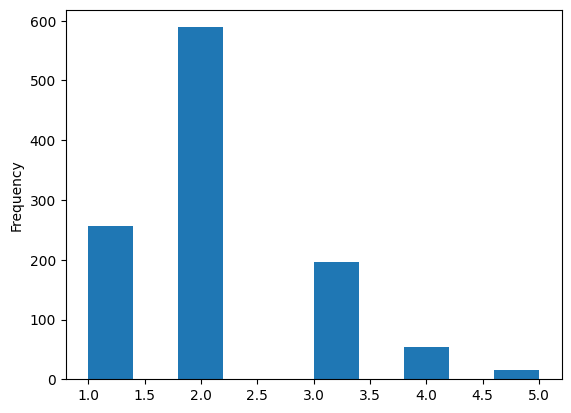

In [ ]:
## **e5. Tabla de Datos - ESTADO_ORDEN_ELECTRÓNICA**
df_Perú_compras[df_Perú_compras.PERIODO=='202201']['FECHA_ÚLTIMO_ESTADO'].dt.month.plot(kind='hist')

## **e6. Los montos por compra se van a tomar encuenta por a fecha de ultimo estado**

In [ ]:
## **e6. Los montos por compra se van a tomar encuenta por a fecha de ultimo estado**
df_Perú_compras['PERIOD_FECHA_ÚLTIMO_ESTADO']=df_Perú_compras['FECHA_ÚLTIMO_ESTADO'].dt.strftime('%Y%m')
df_Perú_compras['PERIOD_FECHA_ÚLTIMO_ESTADO']

0        202202
1        202202
2        202203
3        202201
4        202201
          ...  
12261    202305
12262    202305
12263    202305
12264    202305
12265    202305
Name: PERIOD_FECHA_ÚLTIMO_ESTADO, Length: 190527, dtype: object

In [ ]:
df_Perú_compras.columns

Index(['FECHA_PROCESO', 'RUC_PROVEEDOR', 'PROVEEDOR', 'RUC_ENTIDAD', 'ENTIDAD',
       'TIPO_PROCEDIMIENTO', 'ORDEN_ELECTRÓNICA', 'ORDEN_ELECTRÓNICA_GENERADA',
       'ESTADO_ORDEN_ELECTRÓNICA', 'DOCUMENTO_ESTADO_OCAM',
       'FECHA_FORMALIZACIÓN', 'FECHA_ÚLTIMO_ESTADO', 'SUB_TOTAL', 'IGV',
       'TOTAL', 'ORDEN_DIGITALIZADA', 'DESCRIPCIÓN_ESTADO',
       'DESCRIPCIÓN_CESIÓN_DERECHOS', 'ACUERDO_MARCO', 'ARCHIVO', 'PERIODO',
       'PERIOD_FECHA_ÚLTIMO_ESTADO'],
      dtype='object')

# **e7. Crear un ID que pueda identificar al proveedor, la entidad y la fecha de ultimo estado**

In [ ]:
# **e7. Crear un ID que pueda identificar al proveedor, la entidad y la fecha de ultimo estado**
df_Perú_compras['RUC_MES']=df_Perú_compras['RUC_PROVEEDOR'].astype(str)+'_'+df_Perú_compras['RUC_ENTIDAD'].astype(str)+'_'+df_Perú_compras['PERIOD_FECHA_ÚLTIMO_ESTADO']
df_Perú_compras['RUC_MES']

0        20530182038_20172606777_202202
1        20530182038_20172606777_202202
2        20427497888_20174950971_202203
3        20600257286_20174950971_202201
4        20600668791_20174950971_202201
                      ...              
12261    20609289750_20608010212_202305
12262    20536630954_20608010212_202305
12263    20557233629_20608010212_202305
12264    20600257286_20601761999_202305
12265    20536630954_20601761999_202305
Name: RUC_MES, Length: 190527, dtype: object

#**f. Analisis Descriptivo**

In [ ]:
##**f1. Analisis Descriptivo**
pd.set_option('display.max_columns',200)

# **f2. Filtramos nuestro dataFrame con orden electronica pagada**

In [ ]:
# **F2. Filtramos nuestro dataFrame con orden electronica pagada**
df_Perú_compras2 =df_Perú_compras.query("ESTADO_ORDEN_ELECTRÓNICA == 'PAGADA'")
df_Perú_compras2

,FECHA_PROCESO,RUC_PROVEEDOR,PROVEEDOR,RUC_ENTIDAD,ENTIDAD,TIPO_PROCEDIMIENTO,ORDEN_ELECTRÓNICA,ORDEN_ELECTRÓNICA_GENERADA,ESTADO_ORDEN_ELECTRÓNICA,DOCUMENTO_ESTADO_OCAM,FECHA_FORMALIZACIÓN,FECHA_ÚLTIMO_ESTADO,SUB_TOTAL,IGV,TOTAL,ORDEN_DIGITALIZADA,DESCRIPCIÓN_ESTADO,DESCRIPCIÓN_CESIÓN_DERECHOS,ACUERDO_MARCO,ARCHIVO,PERIODO,PERIOD_FECHA_ÚLTIMO_ESTADO,RUC_MES
0,2022-05-12 12:51:18,20530182038,GRUPO COMPUDATA PERUSOCIEDAD DE RESPONSABILIDA...,20172606777,UNIVERSIDAD NACIONAL DE PIURA,Compra ordinaria,OCAM-2021-99-55-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-02-18 11:11:28,9298.90,1673.80,10972.70,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"IM-CE-2020-5 COMPUTADORAS DE ESCRITORIO, COMPU...",ReportePCBienes202201.csv,202201,202202,20530182038_20172606777_202202
1,2022-05-12 12:51:18,20530182038,GRUPO COMPUDATA PERUSOCIEDAD DE RESPONSABILIDA...,20172606777,UNIVERSIDAD NACIONAL DE PIURA,Compra ordinaria,OCAM-2021-99-57-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-02-18 11:11:05,2894.79,521.06,3415.85,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST...",ReportePCBienes202201.csv,202201,202202,20530182038_20172606777_202202
2,2022-05-12 12:51:18,20427497888,COMERCIAL DENIA S.A.C.,20174950971,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,Compra ordinaria,OCAM-2021-106-327-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-03-30 11:20:38,22640.80,4075.34,26716.14,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST...",ReportePCBienes202201.csv,202201,202203,20427497888_20174950971_202203
5,2022-05-12 12:51:18,20608085069,CERCOR LOGISTICS S.A.C.,20174950971,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,Compra ordinaria,OCAM-2021-106-341-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-03-30 11:29:40,720.00,129.60,849.60,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-7 ÚTILES DE ESCRITORIO, PAPELES Y ...",ReportePCBienes202201.csv,202201,202203,20608085069_20174950971_202203
6,2022-05-12 12:51:18,20100049181,TAI LOY S.A.,20174950971,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,Compra ordinaria,OCAM-2021-106-343-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-03-30 11:30:30,198.03,35.65,233.68,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-7 ÚTILES DE ESCRITORIO, PAPELES Y ...",ReportePCBienes202201.csv,202201,202203,20100049181_20174950971_202203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12258,2023-06-01 08:01:04,20536630954,F.P. TECNOLOGI & SYSTEM S.A.C,20527056579,UNIVERSIDAD NACIONAL MICAELA BASTIDAS DE APURIMAC,Compra ordinaria,OCAM-2023-1092-36-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,NaN,2023-05-02,2023-05-24 02:24:55,11932.86,2147.91,14080.77,https://saeusceprod01.blob.core.windows.net/co...,Actualizado automáticamente por la vinculación...,NaN,"EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...",ReportePCBienes202305.csv,202305,202305,20536630954_20527056579_202305
12259,2023-06-01 08:01:04,20603013965,SYSTEM CUSCO EMPRESA INDIVIDUAL DE RESPONSABIL...,20490770683,CORTE SUPERIOR DE JUSTICIA DE CUSCO,Gran Compra,OCAM-2023-1415-71-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,NaN,2023-05-02,2023-05-25 02:25:43,165891.57,29860.48,195752.05,https://saeusceprod01.blob.core.windows.net/co...,Actualizado automáticamente por la vinculación...,NaN,"EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...",ReportePCBienes202305.csv,202305,202305,20603013965_20490770683_202305
12262,2023-06-01 08:01:0

## **f3. Dimensiones del DataFrame Creado**

In [ ]:
## **f3. Dimensiones del DataFrame Creado**
df_Perú_compras2.shape

(55594, 23)

##**f4. Usando como variable los catalogos electronicos**

In [ ]:
##**f4. Usando como variable los catalogos electronicos**
df_Perú_compras2['ACUERDO_MARCO']

0        IM-CE-2020-5 COMPUTADORAS DE ESCRITORIO, COMPU...
1        EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST...
2        EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST...
5        EXT-CE-2021-7 ÚTILES DE ESCRITORIO, PAPELES Y ...
6        EXT-CE-2021-7 ÚTILES DE ESCRITORIO, PAPELES Y ...
                               ...                        
12258    EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...
12259    EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...
12262    EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...
12264    EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...
12265    EXT-CE-2022-5 COMPUTADORAS DE ESCRITORIO, COMP...
Name: ACUERDO_MARCO, Length: 55594, dtype: object

##**f5. Usando los catalogos electronicos - La Primera variable**

In [ ]:
##**f4. Usando los catalogos electronicos - La Primera variable**
df_Perú_compras2['ACUERDO_MARCO'][0:1]

0    IM-CE-2020-5 COMPUTADORAS DE ESCRITORIO, COMPU...
Name: ACUERDO_MARCO, dtype: object

##**f6. Usando los catalogos electronicos- La Primera variable: Mas completo**

In [ ]:
##**f6. Usando los catalogos electronicos- La Primera variable: Mas completo**
df_Perú_compras2['ACUERDO_MARCO'][0:1].values

array(['IM-CE-2020-5 COMPUTADORAS DE ESCRITORIO, COMPUTADORAS PORTÁTILES Y ESCÁNERES'],
      dtype=object)

##**f7. Usando los catalogos electronicos- La Primera variable: Mas completo separado**

In [ ]:
##**f7. Usando los catalogos electronicos- La Primera variable: Mas completo separado**
'IM-CE-2020-5 COMPUTADORAS DE ESCRITORIO, COMPUTADORAS PORTÁTILES Y ESCÁNERES'.split()

['IM-CE-2020-5',
 'COMPUTADORAS',
 'DE',
 'ESCRITORIO,',
 'COMPUTADORAS',
 'PORTÁTILES',
 'Y',
 'ESCÁNERES']

## **f8. Creamos un diccionario que contenga las descripción completa del catalogo del cual podamos obter solo el codigo**

In [ ]:
## **f8. Creamos un diccionario que contenga las descripción completa del catalogo del cual podamos obter solo el codigo**
dic_ACUERDO_MARCO = {i[0]:' '.join(i[1:]) for i in df_Perú_compras2['ACUERDO_MARCO'].apply(lambda x : x.split())}
dic_ACUERDO_MARCO


{'IM-CE-2020-5': 'COMPUTADORAS DE ESCRITORIO, COMPUTADORAS PORTÁTILES Y ESCÁNERES',
 'EXT-CE-2021-6': 'IMPRESORAS, CONSUMIBLES, REPUESTOS Y ACCESORIOS DE OFICINA',
 'EXT-CE-2021-7': 'ÚTILES DE ESCRITORIO, PAPELES Y CARTONES',
 'EXT-CE-2021-12': 'TUBERIAS, PINTURAS, CERÁMICOS, SANITARIOS, ACCESORIOS, Y COMPLEMENTOS EN GENERAL',
 'IM-CE-2020-17': 'BEBIDAS NO ALCOHÓLICAS',
 'EXT-CE-2021-4': 'MATERIALES DE PROTECCION PARA LA SALUD',
 'EXT-CE-2021-13': 'EQUIPOS DE AIRE ACONDICIONADO, SIMILARES Y ACCESORIOS',
 'EXT-CE-2021-10': 'LLANTAS, NEUMÁTICOS Y ACCESORIOS',
 'EXT-CE-2021-3': 'MATERIALES E INSUMOS DE LIMPIEZA, PAPELES PARA ASEO Y LIMPIEZA',
 'IM-CE-2020-16': 'BIENES Y HERRAMIENTAS PARA USOS DIVERSOS',
 'EXT-CE-2021-1': 'BATERIAS, PILAS Y ACCESORIOS',
 'EXT-CE-2021-14': 'LUMINARIAS, MATERIALES ELÉCTRICOS, Y CABLES ELÉCTRICOS',
 'EXT-CE-2021-11': 'MOBILIARIO EN GENERAL',
 'IM-CE-2021-25': 'CÉSPED SINTÉTICO',
 'EXT-CE-2021-16': 'BIENES Y HERRAMIENTAS PARA USOS DIVERSOS',
 'EXT-CE-2021-2': 

## **f9. Crearemo una variable que solo contenga el codigo**

In [ ]:
## **f9. Crearemo una variable que solo contenga el codigo**

df_Perú_compras2['CODIGO_ACUERDO_MARCO'] =df_Perú_compras2['ACUERDO_MARCO'].apply(lambda x : x.split(' ')[0])
df_Perú_compras2.head()

<ipython-input-184-3f2fe66f0a73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Perú_compras2['CODIGO_ACUERDO_MARCO'] =df_Perú_compras2['ACUERDO_MARCO'].apply(lambda x : x.split(' ')[0])


,FECHA_PROCESO,RUC_PROVEEDOR,PROVEEDOR,RUC_ENTIDAD,ENTIDAD,TIPO_PROCEDIMIENTO,ORDEN_ELECTRÓNICA,ORDEN_ELECTRÓNICA_GENERADA,ESTADO_ORDEN_ELECTRÓNICA,DOCUMENTO_ESTADO_OCAM,FECHA_FORMALIZACIÓN,FECHA_ÚLTIMO_ESTADO,SUB_TOTAL,IGV,TOTAL,ORDEN_DIGITALIZADA,DESCRIPCIÓN_ESTADO,DESCRIPCIÓN_CESIÓN_DERECHOS,ACUERDO_MARCO,ARCHIVO,PERIODO,PERIOD_FECHA_ÚLTIMO_ESTADO,RUC_MES,CODIGO_ACUERDO_MARCO
0,2022-05-12 12:51:18,20530182038,GRUPO COMPUDATA PERUSOCIEDAD DE RESPONSABILIDA...,20172606777,UNIVERSIDAD NACIONAL DE PIURA,Compra ordinaria,OCAM-2021-99-55-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-02-18 11:11:28,9298.90,1673.80,10972.70,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"IM-CE-2020-5 COMPUTADORAS DE ESCRITORIO, COMPU...",ReportePCBienes202201.csv,202201,202202,20530182038_20172606777_202202,IM-CE-2020-5
1,2022-05-12 12:51:18,20530182038,GRUPO COMPUDATA PERUSOCIEDAD DE RESPONSABILIDA...,20172606777,UNIVERSIDAD NACIONAL DE PIURA,Compra ordinaria,OCAM-2021-99-57-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-02-18 11:11:05,2894.79,521.06,3415.85,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST...",ReportePCBienes202201.csv,202201,202202,20530182038_20172606777_202202,EXT-CE-2021-6
2,2022-05-12 12:51:18,20427497888,COMERCIAL DENIA S.A.C.,20174950971,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,Compra ordinaria,OCAM-2021-106-327-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-03-30 11:20:38,22640.80,4075.34,26716.14,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-6 IMPRESORAS, CONSUMIBLES, REPUEST...",ReportePCBienes202201.csv,202201,202203,20427497888_20174950971_202203,EXT-CE-2021-6
5,2022-05-12 12:51:18,20608085069,CERCOR LOGISTICS S.A.C.,20174950971,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,Compra ordinaria,OCAM-2021-106-341-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-03-30 11:29:40,720.00,129.60,849.60,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-7 ÚTILES DE ESCRITORIO, PAPELES Y ...",ReportePCBienes202201.csv,202201,202203,20608085069_20174950971_202203,EXT-CE-2021-7
6,2022-05-12 12:51:18,20100049181,TAI LOY S.A.,20174950971,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,Compra ordinaria,OCAM-2021-106-343-0,https://apps1.perucompras.gob.pe//OrdenCompra/...,PAGADA,https://saeusceprod01.blob.core.windows.net/co...,2022-01-04,2022-03-30 11:30:30,198.03,35.65,233.68,https://saeusceprod01.blob.core.windows.net/co...,NaN,NaN,"EXT-CE-2021-7 ÚTILES DE ESCRITORIO, PAPELES Y ...",ReportePCBienes202201.csv,202201,202203,20100049181_20174950971_202203,EXT-CE-2021-7


In [ ]:
## **f9. Crearemo una variable que solo contenga el codigo**
df_Perú_compras2['CODIGO_ACUERDO_MARCO'].unique()

array(['IM-CE-2020-5', 'EXT-CE-2021-6', 'EXT-CE-2021-7', 'EXT-CE-2021-12',
       'IM-CE-2020-17', 'EXT-CE-2021-4', 'EXT-CE-2021-13',
       'EXT-CE-2021-10', 'EXT-CE-2021-3', 'IM-CE-2020-16',
       'EXT-CE-2021-1', 'EXT-CE-2021-14', 'EXT-CE-2021-11',
       'IM-CE-2021-25', 'EXT-CE-2021-16', 'EXT-CE-2021-2',
       'EXT-CE-2021-18', 'IM-CE-2021-26', 'IM-CE-2021-20',
       'EXT-CE-2022-4', 'IM-CE-2022-27', 'IM-CE-2021-21', 'IM-CE-2021-22',
       'IM-CE-2020-8', 'EXT-CE-2022-17', 'EXT-CE-2022-5', 'IM-CE-2022-28',
       'IM-CE-2021-24'], dtype=object)

In [ ]:
## **f9. Crearemo una variable que solo contenga el codigo**
len(df_Perú_compras2['CODIGO_ACUERDO_MARCO'])

55594

# **g. Analisis descriptivo - Parte 2**

In [ ]:
# **g1. Analisis descriptivo - Parte 2**
df_Perú_compras2.columns


Index(['FECHA_PROCESO', 'RUC_PROVEEDOR', 'PROVEEDOR', 'RUC_ENTIDAD', 'ENTIDAD',
       'TIPO_PROCEDIMIENTO', 'ORDEN_ELECTRÓNICA', 'ORDEN_ELECTRÓNICA_GENERADA',
       'ESTADO_ORDEN_ELECTRÓNICA', 'DOCUMENTO_ESTADO_OCAM',
       'FECHA_FORMALIZACIÓN', 'FECHA_ÚLTIMO_ESTADO', 'SUB_TOTAL', 'IGV',
       'TOTAL', 'ORDEN_DIGITALIZADA', 'DESCRIPCIÓN_ESTADO',
       'DESCRIPCIÓN_CESIÓN_DERECHOS', 'ACUERDO_MARCO', 'ARCHIVO', 'PERIODO',
       'PERIOD_FECHA_ÚLTIMO_ESTADO', 'RUC_MES', 'CODIGO_ACUERDO_MARCO'],
      dtype='object')

## **g2. Lista ascendente de los catalogos mas vendido**

In [ ]:
## **g2. Lista ascendente de los catalogos mas vendido**
Ventas_catalogo = df_Perú_compras2.groupby(['CODIGO_ACUERDO_MARCO'])['SUB_TOTAL'].sum().sort_values(ascending=False)
Ventas_catalogo

CODIGO_ACUERDO_MARCO
EXT-CE-2021-7     1.004291e+08
EXT-CE-2021-6     9.823065e+07
IM-CE-2020-5      7.985192e+07
EXT-CE-2021-12    3.227367e+07
EXT-CE-2021-3     2.875614e+07
EXT-CE-2021-16    1.949211e+07
EXT-CE-2021-10    1.847438e+07
EXT-CE-2022-5     1.066804e+07
EXT-CE-2021-4     3.812519e+06
EXT-CE-2021-11    3.598271e+06
EXT-CE-2021-2     3.496756e+06
EXT-CE-2021-18    3.333816e+06
EXT-CE-2021-1     2.788531e+06
EXT-CE-2021-14    2.506715e+06
EXT-CE-2021-13    1.951705e+06
EXT-CE-2022-4     1.293308e+06
IM-CE-2020-17     9.833613e+05
IM-CE-2022-27     3.960157e+05
EXT-CE-2022-17    2.912776e+05
IM-CE-2021-26     1.548044e+05
IM-CE-2021-20     1.324569e+05
IM-CE-2021-22     2.914040e+04
IM-CE-2021-24     2.069428e+04
IM-CE-2021-25     1.573804e+04
IM-CE-2020-8      8.302000e+03
IM-CE-2022-28     3.248000e+03
IM-CE-2020-16     1.800000e+03
IM-CE-2021-21     2.533600e+02
Name: SUB_TOTAL, dtype: float64

## **g3. Recordemos que contenia cada catalogo**

In [ ]:
## **g3. Recordemos que contenia cada catalogo**
dic_ACUERDO_MARCO

{'IM-CE-2020-5': 'COMPUTADORAS DE ESCRITORIO, COMPUTADORAS PORTÁTILES Y ESCÁNERES',
 'EXT-CE-2021-6': 'IMPRESORAS, CONSUMIBLES, REPUESTOS Y ACCESORIOS DE OFICINA',
 'EXT-CE-2021-7': 'ÚTILES DE ESCRITORIO, PAPELES Y CARTONES',
 'EXT-CE-2021-12': 'TUBERIAS, PINTURAS, CERÁMICOS, SANITARIOS, ACCESORIOS, Y COMPLEMENTOS EN GENERAL',
 'IM-CE-2020-17': 'BEBIDAS NO ALCOHÓLICAS',
 'EXT-CE-2021-4': 'MATERIALES DE PROTECCION PARA LA SALUD',
 'EXT-CE-2021-13': 'EQUIPOS DE AIRE ACONDICIONADO, SIMILARES Y ACCESORIOS',
 'EXT-CE-2021-10': 'LLANTAS, NEUMÁTICOS Y ACCESORIOS',
 'EXT-CE-2021-3': 'MATERIALES E INSUMOS DE LIMPIEZA, PAPELES PARA ASEO Y LIMPIEZA',
 'IM-CE-2020-16': 'BIENES Y HERRAMIENTAS PARA USOS DIVERSOS',
 'EXT-CE-2021-1': 'BATERIAS, PILAS Y ACCESORIOS',
 'EXT-CE-2021-14': 'LUMINARIAS, MATERIALES ELÉCTRICOS, Y CABLES ELÉCTRICOS',
 'EXT-CE-2021-11': 'MOBILIARIO EN GENERAL',
 'IM-CE-2021-25': 'CÉSPED SINTÉTICO',
 'EXT-CE-2021-16': 'BIENES Y HERRAMIENTAS PARA USOS DIVERSOS',
 'EXT-CE-2021-2': 

## **g4. Gráficos de las ventas por catálogo**

<Axes: xlabel='CODIGO_ACUERDO_MARCO'>

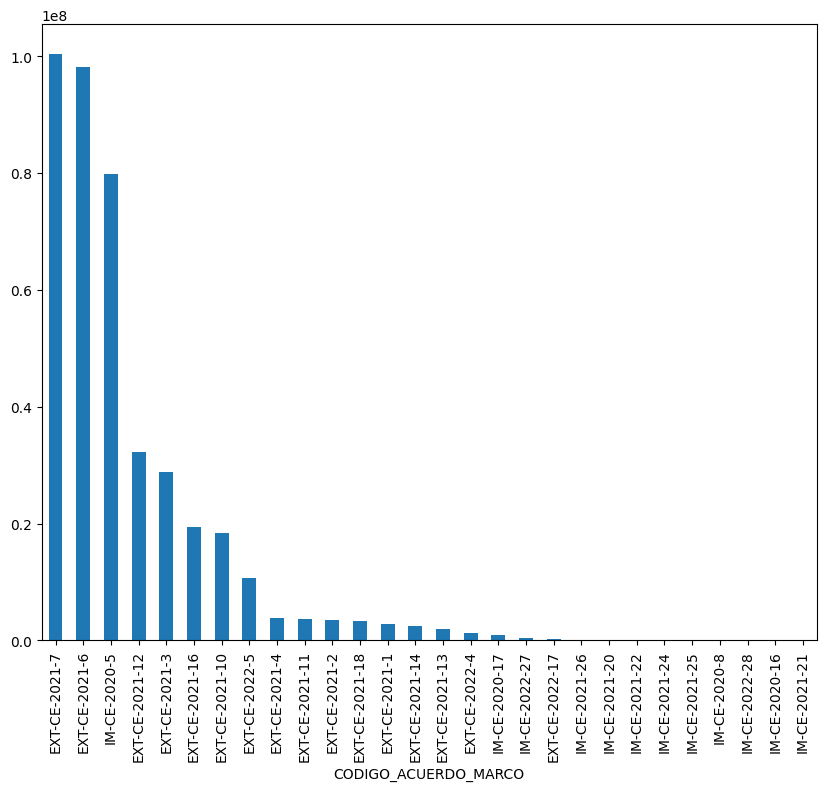

In [ ]:
## **g4. Gráficos de las ventas por catálogo**
Ventas_catalogo.plot(kind = 'bar',figsize = (10,8))

## **g5. Creamos una sublista de catalogos que vende mas de 3 millones**

In [ ]:
## g5. Creamos una sublista de catalogos que vende mas de 3 millones**
lis_Ventas_mayores = list(Ventas_catalogo[Ventas_catalogo >3e06].index)
lis_Ventas_mayores

['EXT-CE-2021-7',
 'EXT-CE-2021-6',
 'IM-CE-2020-5',
 'EXT-CE-2021-12',
 'EXT-CE-2021-3',
 'EXT-CE-2021-16',
 'EXT-CE-2021-10',
 'EXT-CE-2022-5',
 'EXT-CE-2021-4',
 'EXT-CE-2021-11',
 'EXT-CE-2021-2',
 'EXT-CE-2021-18']

## **g4. Gráficos de las ventas por catálogo del mes a mes**

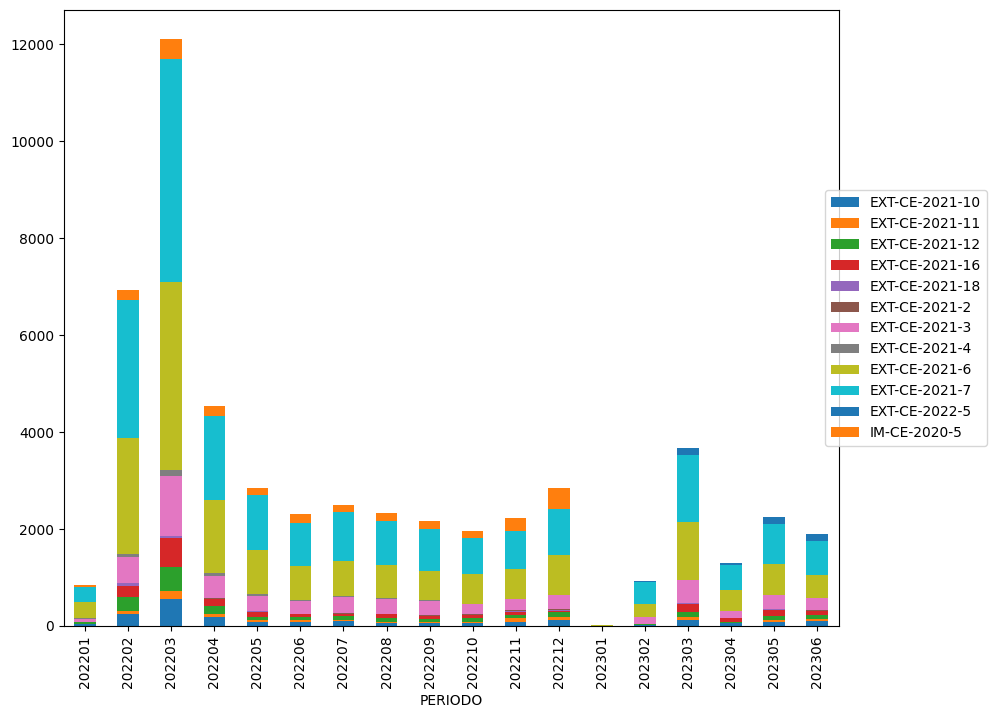

In [ ]:
## **g4. Gráficos de las ventas por catálogo mes a mes**
df_Ventas_mayores = df_Perú_compras2[df_Perú_compras2.CODIGO_ACUERDO_MARCO.isin(lis_Ventas_mayores)]
df_Catalogos = df_Ventas_mayores.groupby(['PERIODO','CODIGO_ACUERDO_MARCO'])['CODIGO_ACUERDO_MARCO'].count().unstack(1)
df_Catalogos.plot(kind = 'bar', stacked = True, figsize = (10,8))
plt.legend(loc = 'right',bbox_to_anchor = (1.2,0.5))

## **g5. Uso de _unstack(1)_**
- Su utilidad es poder girar las variables que se estan trabajando
+ Las filas se convierten en columnas

In [ ]:
## **g5. Uso de _unstack(1)_**
df_Ventas_mayores.groupby(['PERIODO','CODIGO_ACUERDO_MARCO'])['CODIGO_ACUERDO_MARCO'].count()

PERIODO  CODIGO_ACUERDO_MARCO
202201   EXT-CE-2021-10           35
         EXT-CE-2021-11            6
         EXT-CE-2021-12           42
         EXT-CE-2021-16            4
         EXT-CE-2021-3            57
                                ... 
202306   EXT-CE-2021-2            17
         EXT-CE-2021-3           252
         EXT-CE-2021-6           482
         EXT-CE-2021-7           698
         EXT-CE-2022-5           131
Name: CODIGO_ACUERDO_MARCO, Length: 181, dtype: int64

In [ ]:
## **g5. Uso de _unstack(1)_**
df_Ventas_mayores.groupby(['PERIODO','CODIGO_ACUERDO_MARCO'])['CODIGO_ACUERDO_MARCO'].count().unstack(1)

CODIGO_ACUERDO_MARCO,EXT-CE-2021-10,EXT-CE-2021-11,EXT-CE-2021-12,EXT-CE-2021-16,EXT-CE-2021-18,EXT-CE-2021-2,EXT-CE-2021-3,EXT-CE-2021-4,EXT-CE-2021-6,EXT-CE-2021-7,EXT-CE-2022-5,IM-CE-2020-5
PERIODO,,,,,,,,,,,,
202201,35.0,6.0,42.0,4.0,NaN,NaN,57.0,18.0,333.0,316.0,NaN,34.0
202202,237.0,74.0,277.0,232.0,60.0,7.0,542.0,58.0,2394.0,2832.0,NaN,221.0
202203,546.0,180.0,497.0,601.0,29.0,10.0,1235.0,123.0,3877.0,4594.0,NaN,407.0
202204,176.0,66.0,162.0,151.0,6.0,6.0,470.0,47.0,1510.0,1730.0,NaN,218.0
202205,85.0,32.0,71.0,110.0,7.0,5.0,304.0,40.0,907.0,1142.0,NaN,143.0
202206,89.0,29.0,67.0,55.0,1.0,8.0,259.0,19.0,710.0,890.0,NaN,180.0
202207,103.0,25.0,69.0,55.0,3.0,3.0,337.0,24.0,715.0,1012.0,NaN,147.0
202208,69.0,19.0,79.0,74.0,3.0,11.0,296.0,28.0,678.0,911.0,NaN,167.0
202209,55.0,34.0,56.0,66.0,4.0,15.0,277.0,27.0,607.0,867.0,NaN,161.0


## **g6. Gráficos de las ventas por catálogo mes a mes suma total**

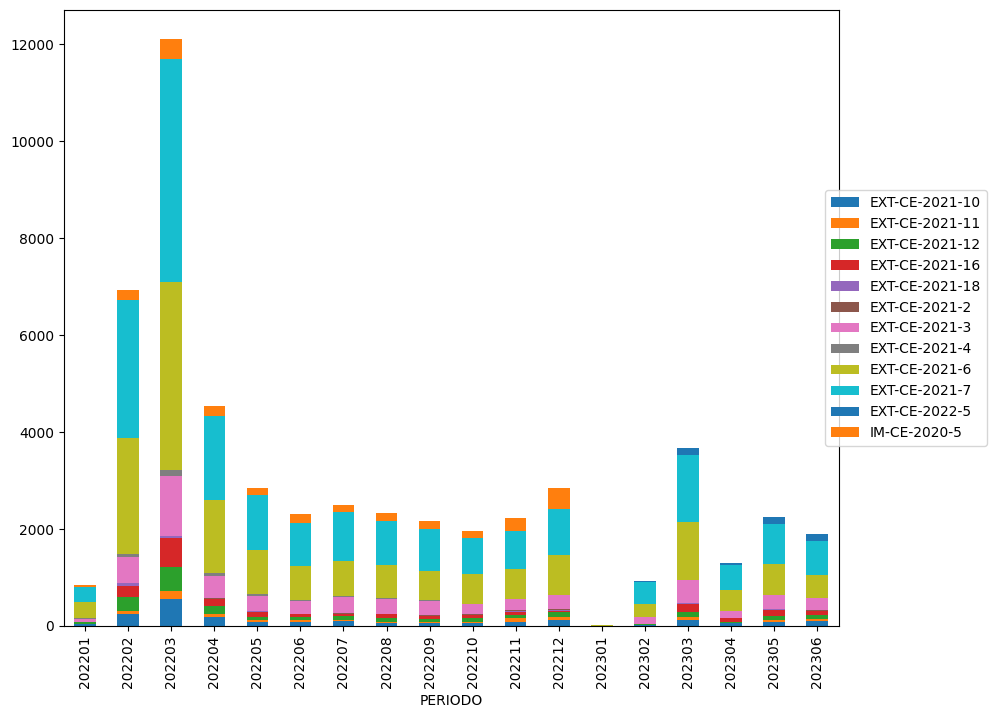

In [ ]:
## **g6. Gráficos de las ventas por catálogo mes a mes suma total**

df_Ventas_mayores_suma = df_Ventas_mayores.groupby(['PERIOD_FECHA_ÚLTIMO_ESTADO','CODIGO_ACUERDO_MARCO'])['SUB_TOTAL'].sum().unstack(1)
df_Catalogos.plot(kind = 'bar', stacked = True, figsize = (10,8))
plt.legend(loc = 'right',bbox_to_anchor = (1.2,0.5))

# **g7. Lista de los catalogos mas vendidos**

In [ ]:
# **g7. Lista de los catalogos mas vendidos**
df_Ventas_mayores_suma.sum().sort_values()

CODIGO_ACUERDO_MARCO
EXT-CE-2021-18    3.333816e+06
EXT-CE-2021-2     3.496756e+06
EXT-CE-2021-11    3.598271e+06
EXT-CE-2021-4     3.812519e+06
EXT-CE-2022-5     1.066804e+07
EXT-CE-2021-10    1.847438e+07
EXT-CE-2021-16    1.949211e+07
EXT-CE-2021-3     2.875614e+07
EXT-CE-2021-12    3.227367e+07
IM-CE-2020-5      7.985192e+07
EXT-CE-2021-6     9.823065e+07
EXT-CE-2021-7     1.004291e+08
dtype: float64

## **g8. Analisis de los catalogos mas vendidos**

In [ ]:
## **g8. Analisis de los catalogos mas vendidos**
lista_Ventas_mayores_suma = ['EXT-CE-2021-6','EXT-CE-2021-7']
df_Ventas_mayores_suma = df_Perú_compras2[df_Perú_compras2.CODIGO_ACUERDO_MARCO.isin(lista_Ventas_mayores_suma)][['CODIGO_ACUERDO_MARCO','ENTIDAD','RUC_MES',
                                                                                                                  'SUB_TOTAL','TOTAL','PERIODO','PERIOD_FECHA_ÚLTIMO_ESTADO']]
df_Ventas_mayores_suma

,CODIGO_ACUERDO_MARCO,ENTIDAD,RUC_MES,SUB_TOTAL,TOTAL,PERIODO,PERIOD_FECHA_ÚLTIMO_ESTADO
1,EXT-CE-2021-6,UNIVERSIDAD NACIONAL DE PIURA,20530182038_20172606777_202202,2894.79,3415.85,202201,202202
2,EXT-CE-2021-6,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,20427497888_20174950971_202203,22640.80,26716.14,202201,202203
5,EXT-CE-2021-7,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,20608085069_20174950971_202203,720.00,849.60,202201,202203
6,EXT-CE-2021-7,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,20100049181_20174950971_202203,198.03,233.68,202201,202203
7,EXT-CE-2021-7,UNIVERSIDAD NACIONAL DE EDUCACION ENRIQUE GUZM...,20608085069_20174950971_202203,670.00,790.60,202201,202203
...,...,...,...,...,...,...,...
12242,EXT-CE-2021-7,MINISTERIO PUBLICO - GERENCIA ADMINISTRATIVA D...,20600007310_20539961919_202305,907.20,1070.50,202305,202305
12243,EXT-CE-2021-7,GOBIERNO REGIONAL SAN MARTIN,10008334477_20531375808_202306,9660.00,9660.00,202305,202306
12244,EXT-CE-2021-7,UNIDAD DE GESTION EDUCATIVA LOCAL CHURCAMPA,20603281706_20600937422_202305,8313.00,9809.34,202305,202305
12245,EXT-CE-2021-7,UNIDAD EJECUTORA EDUCACION HUANCAYO,20568169094_20600657594_202305,3243.90,3827.80,202305,202305


## **g8. Analisis de los catalogos mas vendidos - Tamaño del Archivo**

In [ ]:
## **g8. Analisis de los catalogos mas vendidos - Tamaño del Archivo**
df_Ventas_mayores_suma.shape

(37471, 7)

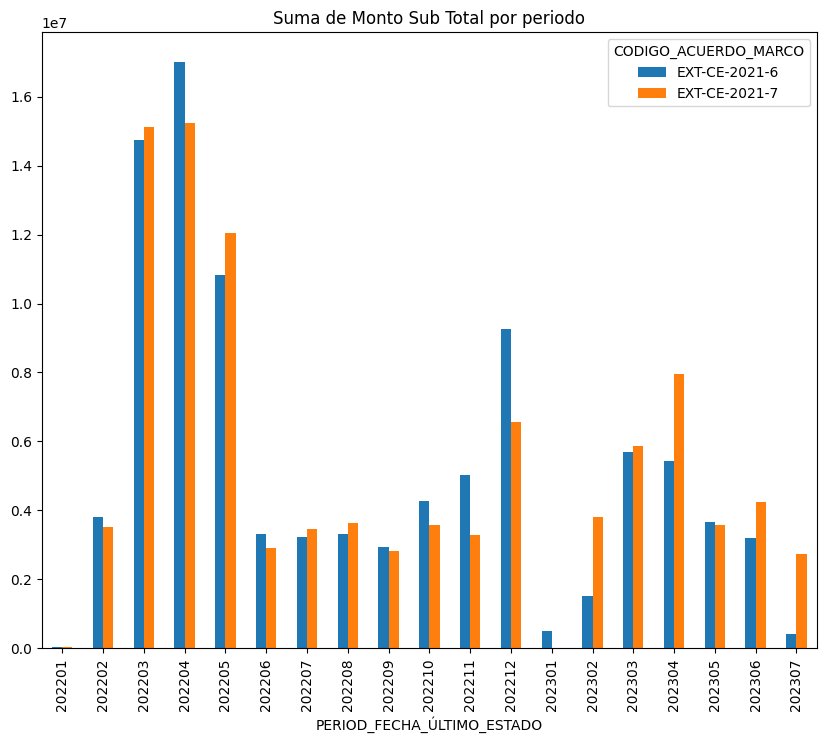

In [ ]:

df_Ventas_mayores_suma.groupby(['PERIOD_FECHA_ÚLTIMO_ESTADO','CODIGO_ACUERDO_MARCO'])['SUB_TOTAL'].sum().unstack(1).plot(kind = 'bar',  figsize = (10,8))
plt.title('Suma de Monto Sub Total por periodo', fontsize = 12)
plt.show()

## **g9. Analisis de los catalogos mas vendidos - Variables en estudio**

In [ ]:
## **g9. Analisis de los catalogos mas vendidos - Variables en estudio**
df_Perú_compras2.columns

Index(['FECHA_PROCESO', 'RUC_PROVEEDOR', 'PROVEEDOR', 'RUC_ENTIDAD', 'ENTIDAD',
       'TIPO_PROCEDIMIENTO', 'ORDEN_ELECTRÓNICA', 'ORDEN_ELECTRÓNICA_GENERADA',
       'ESTADO_ORDEN_ELECTRÓNICA', 'DOCUMENTO_ESTADO_OCAM',
       'FECHA_FORMALIZACIÓN', 'FECHA_ÚLTIMO_ESTADO', 'SUB_TOTAL', 'IGV',
       'TOTAL', 'ORDEN_DIGITALIZADA', 'DESCRIPCIÓN_ESTADO',
       'DESCRIPCIÓN_CESIÓN_DERECHOS', 'ACUERDO_MARCO', 'ARCHIVO', 'PERIODO',
       'PERIOD_FECHA_ÚLTIMO_ESTADO', 'RUC_MES', 'CODIGO_ACUERDO_MARCO'],
      dtype='object')

# **h. Medidas descriptivas**

## **h1. Escojamos el mas vendido**

In [ ]:
## **h1. Escojamos el cataogo mas vendido en un mes especifico**
df_Ventas_mayores_suma2 = df_Ventas_mayores_suma.query('PERIOD_FECHA_ÚLTIMO_ESTADO == "202204"')
df_Ventas_mayores_suma2

,CODIGO_ACUERDO_MARCO,ENTIDAD,RUC_MES,SUB_TOTAL,TOTAL,PERIODO,PERIOD_FECHA_ÚLTIMO_ESTADO
18,EXT-CE-2021-7,GOBIERNO REGIONAL DE HUANUCO-EDUCACION DOS DE ...,20602991491_20489252784_202204,6974.00,8229.32,202201,202204
19,EXT-CE-2021-7,GOBIERNO REGIONAL DE HUANUCO-EDUCACION DOS DE ...,20606231394_20489252784_202204,3992.59,4711.26,202201,202204
39,EXT-CE-2021-6,MUNICIPALIDAD DISTRITAL DE PISACOMA,20604564485_20188420509_202204,6737.01,7949.64,202201,202204
242,EXT-CE-2021-6,MUNICIPALIDAD PROVINCIAL DE REQUENA,20528169393_20165979967_202204,12294.57,14507.59,202201,202204
326,EXT-CE-2021-7,MUNICIPALIDAD DISTRITAL DE COMBAPATA,10738781380_20216274459_202204,164.40,193.99,202201,202204
...,...,...,...,...,...,...,...
16691,EXT-CE-2021-6,MUNICIPALIDAD DISTRITAL DE CHILCA - HUANCAYO,10436493903_20133696661_202204,767.94,906.17,202203,202204
16695,EXT-CE-2021-6,MUNICIPALIDAD DISTRITAL DE MARIANO MELGAR,20516826887_20170422971_202204,1361.55,1606.63,202203,202204
16701,EXT-CE-2021-7,GOBIERNO REGIONAL DE MOQUEGUA-EDUCACION,20272690287_20166236950_202204,1800.00,2124.00,202203,202204
16722,EXT-CE-2021-7,GOBIERNO REGIONAL DE LIMA - UNIDAD DE GESTION ...,20600679091_20191551371_202204,13082.47,15437.31,202203,202204


## **h2. Box- Plot para nuestra dos catalogos en Abril**
+ Se requiere aplicar una transformación

<Axes: xlabel='CODIGO_ACUERDO_MARCO', ylabel='SUB_TOTAL'>

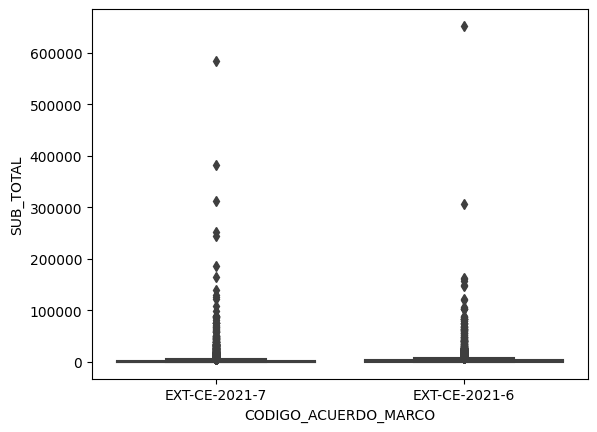

In [ ]:
## **h2. Box- Plot para nuestra dos catalogos en Abril**
sns.boxplot(x = 'CODIGO_ACUERDO_MARCO', y = 'SUB_TOTAL', data =df_Ventas_mayores_suma2 )

## **h3. Agregamos la columna transformada a nuestra base nueva de datos**

In [ ]:
## **h3. Agregamos la columna transformada a nuestra base nueva de datos**
df_Ventas_mayores_suma2['LOG_TOTAL']=df_Ventas_mayores_suma2['SUB_TOTAL'].transform(np.log)

<ipython-input-53-b831a70b36bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ventas_mayores_suma2['LOG_TOTAL']=df_Ventas_mayores_suma2['SUB_TOTAL'].transform(np.log)


## **h4. Box- Plot para nuestra dos catalogos en Abril con la variable transformada**

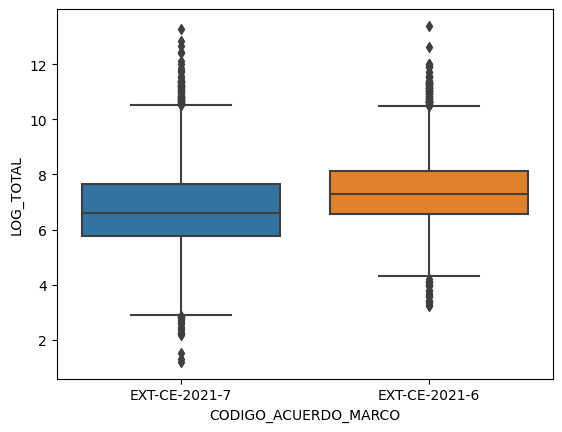

In [ ]:
## **h4. Box- Plot para nuestra dos catalogos en Abril con la variable transformada**
sns.boxplot(x = 'CODIGO_ACUERDO_MARCO', y = 'LOG_TOTAL', data =df_Ventas_mayores_suma2 )
plt.show()

# **i. Tratamiento de valores atipicos**
+ Método de Percentil - Mantenemos la simetría en ambos lados
+ No es recomendable eliminar los atípicos.


## **i1. Usamos Winsorización - Hallamos el percentil 95**

In [ ]:
## **i1. Usamos Winsorización - Hallamos el percentil 95**
df_Ventas_mayores_suma2.groupby('CODIGO_ACUERDO_MARCO').SUB_TOTAL.quantile([0.95])

CODIGO_ACUERDO_MARCO      
EXT-CE-2021-6         0.95    20031.2140
EXT-CE-2021-7         0.95    15874.1975
Name: SUB_TOTAL, dtype: float64

## **i2. Usamos Winsorización - Hallamos el percentil 5**

In [ ]:
## **i2. Usamos Winsorización - Hallamos el percentil 5**
df_Ventas_mayores_suma2.groupby('CODIGO_ACUERDO_MARCO').SUB_TOTAL.quantile([0.05])

CODIGO_ACUERDO_MARCO      
EXT-CE-2021-6         0.05    239.499
EXT-CE-2021-7         0.05    112.395
Name: SUB_TOTAL, dtype: float64

## **i3. Medidads descriptivas**

In [ ]:
## **i3. Medidads descriptivas**
df_Ventas_mayores_suma2.groupby('CODIGO_ACUERDO_MARCO').SUB_TOTAL.agg({'mean','median','sum','std','min','max','count'})

,min,median,mean,count,sum,std,max
CODIGO_ACUERDO_MARCO,,,,,,,
EXT-CE-2021-6,25.03,1443.69,5113.795155,3327,17013596.48,17334.854056,652400.0
EXT-CE-2021-7,3.31,743.20,4014.132746,3794,15229619.64,17133.029596,584656.0


## **i4. Realizamos una copia de nuestro DataFrame**

In [ ]:
## **i4. Realizamos una copia de nuestro DataFrame**
df_Ventas_mayores_suma3 = df_Ventas_mayores_suma2.copy()

## **i5. Construimos dos diccionarios para cada cuantil**

In [ ]:
## **i5. Construimos dos diccionarios para cada cuantil**
dic_quantil95 = df_Ventas_mayores_suma3.groupby('CODIGO_ACUERDO_MARCO').SUB_TOTAL.quantile([0.95]).to_dict()
dic_quantil05 = df_Ventas_mayores_suma3.groupby('CODIGO_ACUERDO_MARCO').SUB_TOTAL.quantile([0.05]).to_dict()

## **i6. Chequeamos los cuantiles construidos**

In [ ]:
## **i6. Chequeamos los cuantiles construidos**
print('Valores criticos superiores al 95% tienen mínimo en ', dic_quantil95)
print('Valores criticos inferiores al 05% tienen máximo en ', dic_quantil05)


Valores criticos superiores al 95% tienen mínimo en  {('EXT-CE-2021-6', 0.95): 20031.214, ('EXT-CE-2021-7', 0.95): 15874.197499999995}
Valores criticos inferiores al 05% tienen máximo en  {('EXT-CE-2021-6', 0.05): 239.49900000000002, ('EXT-CE-2021-7', 0.05): 112.395}


## **i7. Construimos el diccionario para la mediana**

In [ ]:
## **i7. Construimos el diccionario para la mediana**
dic_Mediana = df_Ventas_mayores_suma3.groupby('CODIGO_ACUERDO_MARCO').SUB_TOTAL.median().to_dict()
print('Valores criticos inferiores al 05% y superiores al 95% seran reemplazados por ', dic_Mediana)

Valores criticos inferiores al 05% y superiores al 95% seran reemplazados por  {'EXT-CE-2021-6': 1443.69, 'EXT-CE-2021-7': 743.2}


## **i8. Chequeamos los valores para SUB_TOTAL con nuestro nuevo**

In [ ]:
## **i8. Chequeamos los valores para SUB_TOTAL**
df_Ventas_mayores_suma3.SUB_TOTAL

18        6974.00
19        3992.59
39        6737.01
242      12294.57
326        164.40
           ...   
16691      767.94
16695     1361.55
16701     1800.00
16722    13082.47
16736      250.00
Name: SUB_TOTAL, Length: 7121, dtype: float64

## **i9. Chequeamos los valores para SUB_TOTAL donde se cumplen algunas condiciones**

In [ ]:
## **i9. Chequeamos los valores para SUB_TOTAL donde se cumplen algunas condiciones**
a = (df_Ventas_mayores_suma3.CODIGO_ACUERDO_MARCO =='EXT-CE-2021-6')
b = df_Ventas_mayores_suma3.SUB_TOTAL>dic_quantil95[('EXT-CE-2021-6', 0.95)]
print(a, b)

18       False
19       False
39        True
242       True
326      False
         ...  
16691     True
16695     True
16701    False
16722    False
16736    False
Name: CODIGO_ACUERDO_MARCO, Length: 7121, dtype: bool 18       False
19       False
39       False
242      False
326      False
         ...  
16691    False
16695    False
16701    False
16722    False
16736    False
Name: SUB_TOTAL, Length: 7121, dtype: bool


# **j. Realizamos la imputación de datos**

## **j1. Imputamos los datos**

In [ ]:
## **j1. Imputamos los datos**
df_Ventas_mayores_suma3.loc[(df_Ventas_mayores_suma3.CODIGO_ACUERDO_MARCO =='EXT-CE-2021-6') & ((df_Ventas_mayores_suma3.SUB_TOTAL > dic_quantil95[('EXT-CE-2021-6', 0.95)]) |

  (df_Ventas_mayores_suma3.SUB_TOTAL < dic_quantil05[('EXT-CE-2021-6', 0.05)])),'SUB_TOTAL']=dic_Mediana['EXT-CE-2021-6']

In [ ]:
df_Ventas_mayores_suma3.loc[(df_Ventas_mayores_suma3.CODIGO_ACUERDO_MARCO =='EXT-CE-2021-7') & ((df_Ventas_mayores_suma3.SUB_TOTAL > dic_quantil95[('EXT-CE-2021-7', 0.95)]) |

  (df_Ventas_mayores_suma3.SUB_TOTAL < dic_quantil05[('EXT-CE-2021-7', 0.05)])),'SUB_TOTAL']=dic_Mediana['EXT-CE-2021-7']

## **j2. Box- Plot para nuestra dos catalogos en Abril con los datos imputados originales**

<Axes: xlabel='CODIGO_ACUERDO_MARCO', ylabel='SUB_TOTAL'>

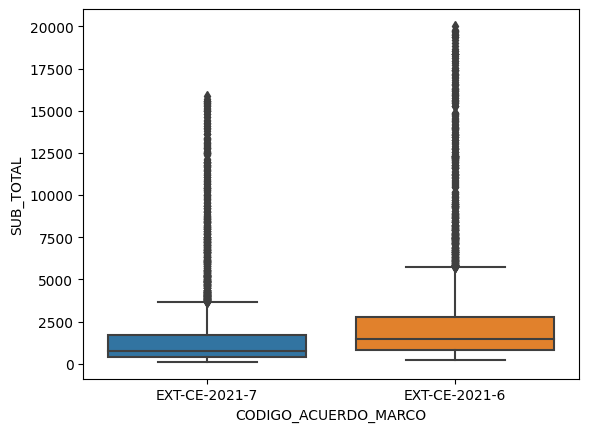

In [ ]:
## **j2. Box- Plot para nuestra dos catalogos en Abril con los datos imputados originales**
sns.boxplot(x = 'CODIGO_ACUERDO_MARCO', y = 'SUB_TOTAL', data =df_Ventas_mayores_suma3 )

## **j3. Transformamos nuestra variable SUB_TOTAL usando logartimo**

In [ ]:
## **j3. Transformamos nuestra variable SUB_TOTAL usando logartimo**
df_Ventas_mayores_suma3['LOG_SUB_TOTAL']=df_Ventas_mayores_suma3['SUB_TOTAL'].transform(np.log)

## **j4. Box- Plot para nuestra dos catalogos en Abril con la variable transformada LOG_SUB_TOTAL**

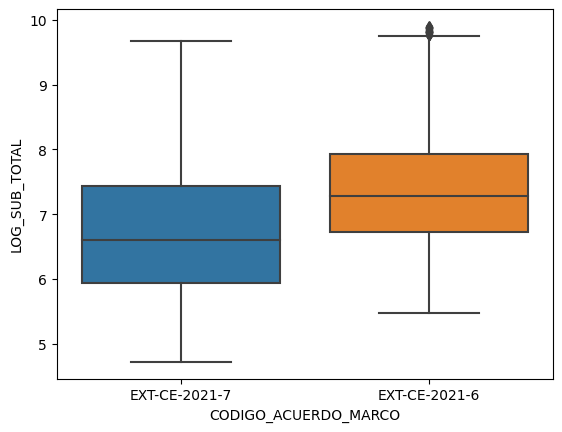

In [ ]:
## **j4. Box- Plot para nuestra dos catalogos en Abril con la variable transformada LOG_SUB_TOTAL**
sns.boxplot(x = 'CODIGO_ACUERDO_MARCO', y = 'LOG_SUB_TOTAL', data =df_Ventas_mayores_suma3 )
plt.show()

# **k. Generalizando el procedimiento**

In [ ]:
## **k1. Generalizando el proceso**
def fun_generalizadora (df,P_Sup,P_inf):
  df1 = df.copy()
  dic_quantil95 = df1.groupby('CODIGO_ACUERDO_MARCO').SUB_TOTAL.quantile(P_Sup).to_dict()
  dic_quantil05 = df1.groupby('CODIGO_ACUERDO_MARCO').SUB_TOTAL.quantile(P_inf).to_dict()
  dic_Mediana = df1.groupby(['CODIGO_ACUERDO_MARCO'])['SUB_TOTAL'].median().to_dict()

  # Realizando la imputación
  df1['MOD_SUB_TOTAL'] = df1['SUB_TOTAL'].copy()
  df1.loc[(df1.CODIGO_ACUERDO_MARCO =='EXT-CE-2021-6') & ((df1.SUB_TOTAL > dic_quantil95['EXT-CE-2021-6']) |
   (df1.SUB_TOTAL < dic_quantil05['EXT-CE-2021-6'])),'MOD_SUB_TOTAL']=dic_Mediana['EXT-CE-2021-6']

  df1.loc[(df1.CODIGO_ACUERDO_MARCO =='EXT-CE-2021-7') & ((df1.SUB_TOTAL > dic_quantil95['EXT-CE-2021-7']) |
   (df1.SUB_TOTAL < dic_quantil05['EXT-CE-2021-7'])),'MOD_SUB_TOTAL']=dic_Mediana['EXT-CE-2021-7']



   ## **. Transformamos nuestra variable SUB_TOTAL usando logartimo**
  df1['LOG_MOD_SUB_TOTAL']=df1['MOD_SUB_TOTAL'].transform(np.log)

  del  dic_quantil95, dic_Mediana
  return df1

# **l. Elegimos el mes de Mayo 202205**

## **l1. Elegimos el mes de Enero de 202205**

In [ ]:
## **l1. Elegimos el mes de Enero de 202205**
df_temp202205 = fun_generalizadora (df_Ventas_mayores_suma[df_Ventas_mayores_suma.PERIOD_FECHA_ÚLTIMO_ESTADO=='202205'],0.95,0.05)

## **l2. Box- Plot sin importar datos con los datos  originales**

<Axes: xlabel='CODIGO_ACUERDO_MARCO', ylabel='SUB_TOTAL'>

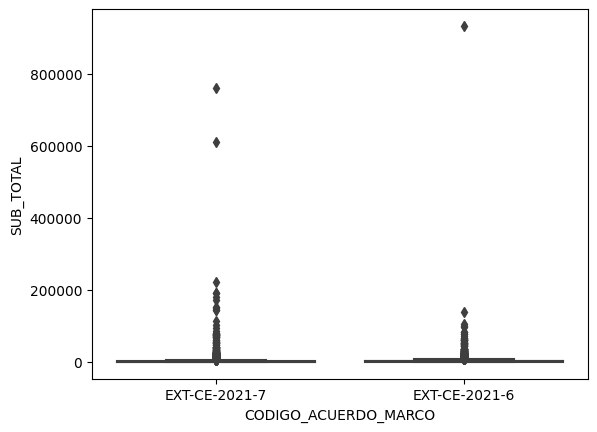

In [ ]:
## **l2. Box- Plot sin importar datos con los datos  originales**
sns.boxplot(x = 'CODIGO_ACUERDO_MARCO', y = 'SUB_TOTAL', data =df_temp202205 )

## **l3. Box- Plot sin importar datos con los datos limpiados por la mediana**

<Axes: xlabel='CODIGO_ACUERDO_MARCO', ylabel='MOD_SUB_TOTAL'>

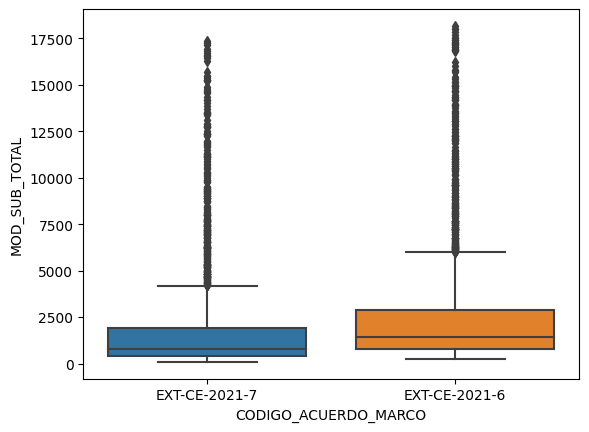

In [ ]:
## **l3. Box- Plot sin importar datos con los datos limpiados por la mediana **
sns.boxplot(x = 'CODIGO_ACUERDO_MARCO', y = 'MOD_SUB_TOTAL', data =df_temp202205 )

## **l4. Box- Plot sin importar datos con los datos  limpios transformados**

<Axes: xlabel='CODIGO_ACUERDO_MARCO', ylabel='LOG_MOD_SUB_TOTAL'>

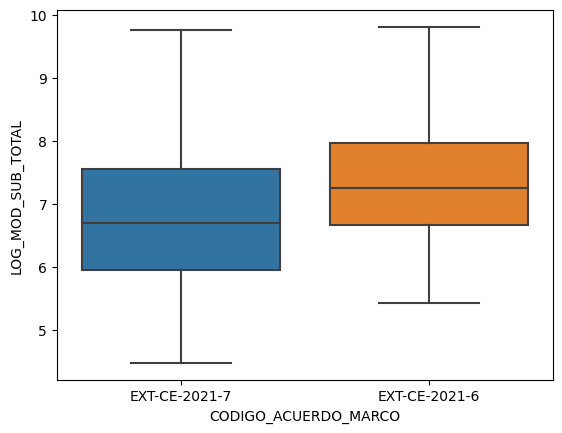

In [ ]:
## **l4. Box- Plot sin importar datos con los datos  limpios transformados**
sns.boxplot(x = 'CODIGO_ACUERDO_MARCO', y = 'LOG_MOD_SUB_TOTAL', data =df_temp202205 )

# **m. Generalizando con todos los meses**

## **m1. Lista con todos los meses**

In [ ]:
## **m1. Lista con todos los meses**
Meses_Peru_compras = df_Ventas_mayores_suma['PERIOD_FECHA_ÚLTIMO_ESTADO'].unique()
Meses_Peru_compras

array(['202202', '202203', '202201', '202204', '202205', '202207',
       '202206', '202208', '202209', '202212', '202211', '202302',
       '202301', '202303', '202210', '202306', '202307', '202304',
       '202305'], dtype=object)

## **m2. Este es el Bucle creado**

In [ ]:
## **m2. Este es el Bucle creado**
Lista_dfMeses_Peru_compras =[]
for i in sorted(Meses_Peru_compras):
  print(i)
  temp = df_Ventas_mayores_suma[df_Ventas_mayores_suma.PERIOD_FECHA_ÚLTIMO_ESTADO==i]
  Lista_dfMeses_Peru_compras.append(fun_generalizadora (temp,0.95,0.05))
  del temp

202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212
202301
202302
202303
202304
202305
202306
202307


In [ ]:
# **m3. Concatenamos todos los dataFrames**
df_Ventas_mayores_suma_Total = pd.concat(Lista_dfMeses_Peru_compras, axis = 0)

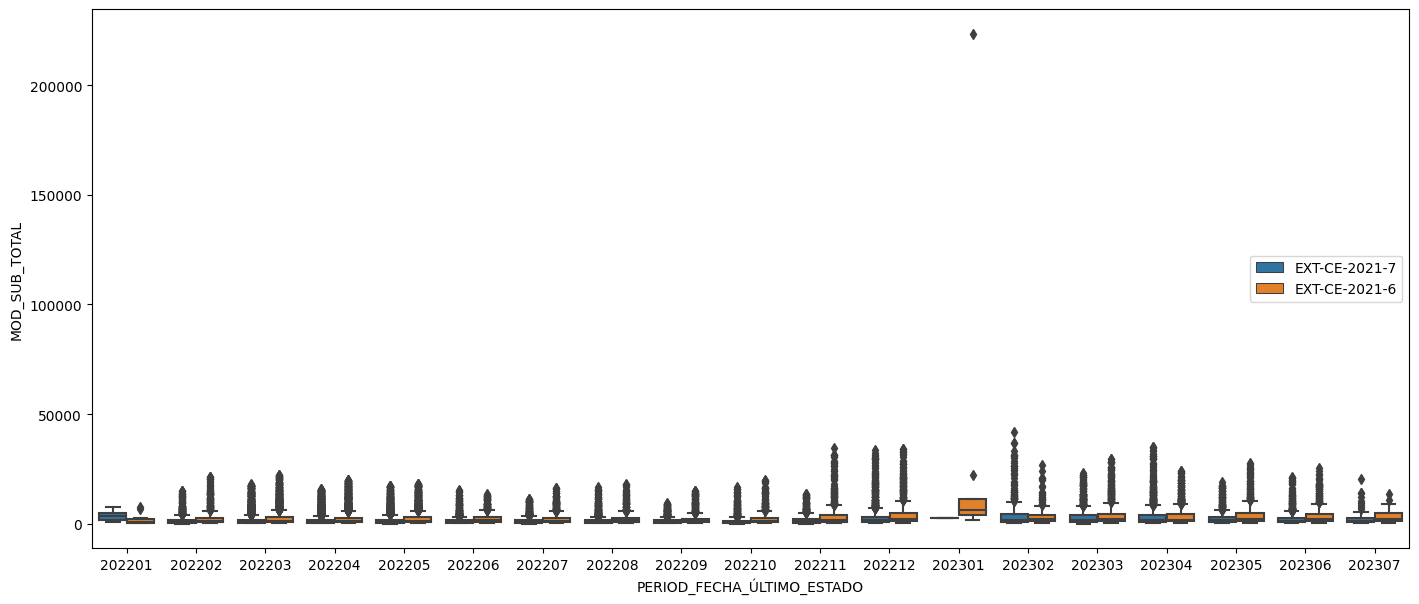

In [ ]:
## **l3. Box- Plot sin importar datos con los datos limpiados por la mediana **
plt.figure(figsize=(17,7))
sns.boxplot(x = 'PERIOD_FECHA_ÚLTIMO_ESTADO', y = 'MOD_SUB_TOTAL',hue='CODIGO_ACUERDO_MARCO', data =df_Ventas_mayores_suma_Total )
plt.legend(loc='right')
plt.show()

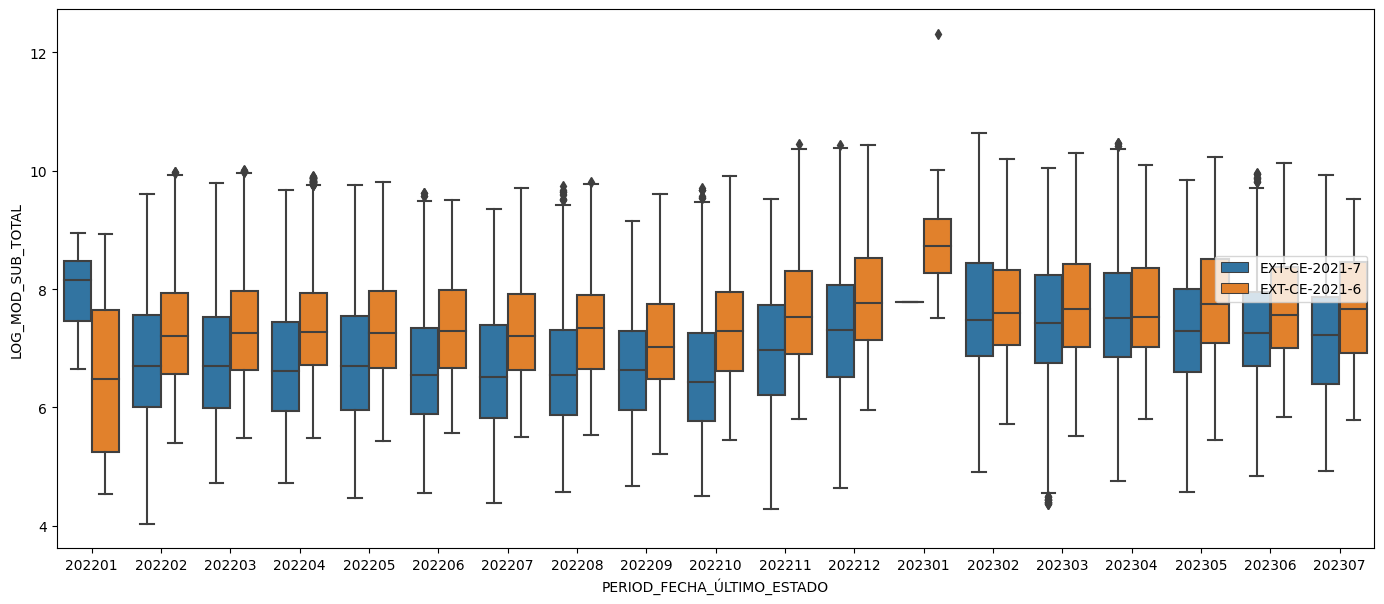

In [ ]:
## **l3. Box- Plot sin importar datos con los datos limpiados por la mediana **
plt.figure(figsize=(17,7))
sns.boxplot(x = 'PERIOD_FECHA_ÚLTIMO_ESTADO', y = 'LOG_MOD_SUB_TOTAL',hue='CODIGO_ACUERDO_MARCO', data =df_Ventas_mayores_suma_Total )
plt.legend(loc='right')
plt.show()